In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 한번만 실행하쇼
# !unzip -q "/content/drive/MyDrive/25-1 티썸/data/archive.zip" -d "/content/drive/MyDrive/25-1 티썸/data/raw"

In [2]:
!pip install retina-face

import cv2
from retinaface import RetinaFace
from pathlib import Path
from google.colab.patches import cv2_imshow

# 1개만 예시로

In [ ]:
# 1. 경로 설정
video_path = "/content/01__exit_phone_room.mp4"
output_dir = Path("/content/test")
output_dir.mkdir(exist_ok=True)

# 2. 영상 열기
cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)
interval = int(total_frames / 16)

# 3. 프레임 샘플링 + 얼굴 crop
saved = 0
idx = 0
while cap.isOpened() and saved < 16:
    ret, frame = cap.read()
    if not ret:
        break
    if idx % interval == 0:
        # 얼굴 검출
        faces = RetinaFace.detect_faces(frame)
        if isinstance(faces, dict):
            first_face = list(faces.values())[0]
            facial_area = first_face['facial_area']
            x1, y1, x2, y2 = facial_area
            crop = frame[y1:y2, x1:x2]
            crop = cv2.resize(crop, (224, 224))
            # 저장
            out_path = output_dir / f"face_{saved:02d}.jpg"
            cv2.imwrite(str(out_path), crop)
            saved += 1
    idx += 1

cap.release()
print(f"Saved {saved} face crops to {output_dir}")

Saved 16 face crops to /content/test


# 전체

## 경로 설정

In [3]:
import os
from pathlib import Path

original_dir = Path("/content/drive/MyDrive/25-1 티썸/data/raw/DFD_original sequences")
manipulated_dir = Path("/content/drive/MyDrive/25-1 티썸/data/raw/DFD_manipulated_sequences/DFD_manipulated_sequences")

save_original = Path("/content/drive/MyDrive/25-1 티썸/data/cropped/original")
save_manipulated = Path("/content/drive/MyDrive/25-1 티썸/data/cropped/manipulated")

In [4]:
from tqdm import tqdm
from pathlib import Path
import cv2
from retinaface import RetinaFace

def extract_faces_from_videos(video_dir, save_dir, num_frames=8):
    video_dir = Path(video_dir)
    save_dir = Path(save_dir)
    save_dir.mkdir(parents=True, exist_ok=True)

    video_paths = sorted([p for p in video_dir.glob("*.mp4") if p.is_file()])

    tqdm.write(f"[INFO] Found {len(video_paths)} videos in {video_dir.name}")

    for video_path in tqdm(video_paths, desc=f"Processing {video_dir.name}"):
        try:
            cap = cv2.VideoCapture(str(video_path))
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            if total_frames < num_frames:
                tqdm.write(f"[WARN] Skipping {video_path.name} (not enough frames)")
                cap.release()
                continue

            interval = total_frames // num_frames
            frame_idx, saved = 0, 0

            while cap.isOpened() and saved < num_frames:
                ret, frame = cap.read()
                if not ret:
                    break
                if frame_idx % interval == 0:
                    faces = RetinaFace.detect_faces(frame)
                    if isinstance(faces, dict) and len(faces) > 0:
                        face = list(faces.values())[0]
                        x1, y1, x2, y2 = face['facial_area']
                        face_crop = frame[y1:y2, x1:x2]

                        # 저장 경로 생성
                        vid_stem = video_path.stem
                        save_path = save_dir / f"{vid_stem}_{saved:02d}.jpg"
                        cv2.imwrite(str(save_path), face_crop)
                        saved += 1
                frame_idx += 1
            cap.release()

        except Exception as e:
            tqdm.write(f"[ERROR] Failed processing {video_path.name}: {e}")
            continue

In [ ]:
extract_faces_from_videos(original_dir, save_original, num_frames=8)

[INFO] Found 363 videos in DFD_original sequences


Processing DFD_original sequences:   0%|          | 0/363 [00:00<?, ?it/s]

25-07-01 08:46:27 - Directory /root/.deepface created
25-07-01 08:46:27 - Directory /root/.deepface/weights created
25-07-01 08:46:27 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5

  0%|          | 0.00/119M [00:00<?, ?B/s]
  9%|▉         | 11.0M/119M [00:00<00:01, 96.6MB/s]
 26%|██▌       | 30.9M/119M [00:00<00:00, 154MB/s] 
 39%|███▉      | 46.7M/119M [00:00<00:00, 130MB/s]
 53%|█████▎    | 63.4M/119M [00:00<00:00, 124MB/s]
 71%|███████   | 84.4M/119M [00:00<00:00, 128MB/s]
 89%|████████▉ | 105M/119M [00:00<00:00, 131MB/s] 
100%|██████████| 119M/119M [00:00<00:00, 129MB/s]
Processing DFD_original sequences: 100%|██████████| 363/363 [46:57<00:00,  7.76s/it]


In [7]:
extract_faces_from_videos(manipulated_dir, save_manipulated, num_frames=8)

[INFO] Found 3068 videos in DFD_manipulated_sequences


Processing DFD_manipulated_sequences:   0%|          | 0/3068 [00:00<?, ?it/s]

25-07-01 18:53:30 - Directory /root/.deepface created
25-07-01 18:53:30 - Directory /root/.deepface/weights created
25-07-01 18:53:30 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5

  0%|          | 0.00/119M [00:00<?, ?B/s]
  2%|▏         | 2.10M/119M [00:00<00:05, 20.7MB/s]
  9%|▉         | 11.0M/119M [00:00<00:01, 60.4MB/s]
 15%|█▍        | 17.3M/119M [00:00<00:01, 60.6MB/s]
 20%|█▉        | 23.6M/119M [00:00<00:01, 55.8MB/s]
 32%|███▏      | 38.3M/119M [00:00<00:00, 86.2MB/s]
 45%|████▍     | 53.0M/119M [00:00<00:00, 92.3MB/s]
 53%|█████▎    | 63.4M/119M [00:00<00:00, 95.7MB/s]
 62%|██████▏   | 73.4M/119M [00:00<00:00, 87.4MB/s]
 70%|██████▉   | 82.8M/119M [00:01<00:00, 88.7MB/s]
 80%|███████▉  | 94.9M/119M [00:01<00:00, 88.3MB/s]
100%|██████████| 119M/119M [00:01<00:00, 88.5MB/s]
Processing DFD_manipulated_sequences:  14%|█▍        | 425/3068 [10:47:04<67:04:04, 91.35s/it]


KeyboardInterrupt: 

In [8]:
from pathlib import Path
import re
from collections import Counter

def count_suffix_images(folder_path, suffix_range=8):
    folder = Path(folder_path)
    pattern = re.compile(r"_(\d{2})\.jpg$")

    # 초기 카운터
    counts = Counter({f"{i:02d}": 0 for i in range(suffix_range)})

    for file in folder.glob("*.jpg"):
        match = pattern.search(file.name)
        if match:
            suffix = match.group(1)
            if suffix in counts:
                counts[suffix] += 1

    print(f"[INFO] Suffix counts in '{folder.name}':")
    for i in range(suffix_range):
        s = f"{i:02d}"
        print(f"  Files ending with _{s}.jpg: {counts[s]}")

    return counts

# 예시 사용
count_suffix_images("/content/drive/MyDrive/25-1 티썸/data/cropped/original")
count_suffix_images("/content/drive/MyDrive/25-1 티썸/data/cropped/manipulated")

[INFO] Suffix counts in 'original':
  Files ending with _00.jpg: 363
  Files ending with _01.jpg: 363
  Files ending with _02.jpg: 363
  Files ending with _03.jpg: 363
  Files ending with _04.jpg: 363
  Files ending with _05.jpg: 363
  Files ending with _06.jpg: 363
  Files ending with _07.jpg: 324
[INFO] Suffix counts in 'manipulated':
  Files ending with _00.jpg: 426
  Files ending with _01.jpg: 426
  Files ending with _02.jpg: 426
  Files ending with _03.jpg: 425
  Files ending with _04.jpg: 425
  Files ending with _05.jpg: 425
  Files ending with _06.jpg: 425
  Files ending with _07.jpg: 425


Counter({'00': 426,
         '01': 426,
         '02': 426,
         '03': 425,
         '04': 425,
         '05': 425,
         '06': 425,
         '07': 425})

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch

# 1. 공통 정규화 함수 (0~1 범위로)
to_tensor_norm = transforms.Compose([
    transforms.ToTensor(),  # [0, 255] → [0.0, 1.0]
])

# 2. 리사이즈 후 정규화 변환기
transform_224 = transforms.Compose([
    transforms.Resize((224, 224)),
    to_tensor_norm
])

transform_299 = transforms.Compose([
    transforms.Resize((299, 299)),
    to_tensor_norm
])

# 3. 예시: 이미지 불러와서 두 크기로 처리
def process_image(image_path):
    image = Image.open(image_path).convert("RGB")
    img_224 = transform_224(image)  # shape: [3, 224, 224]
    img_299 = transform_299(image)  # shape: [3, 299, 299]
    return img_224, img_299

# 사용 예시
img_path = "/content/drive/MyDrive/25-1 티썸/data/cropped/original/01__hugging_happy_01.jpg"
img_224_tensor, img_299_tensor = process_image(img_path)

# 텐서 확인
print(f"224x224 shape: {img_224_tensor.shape}, range: {img_224_tensor.min():.2f}~{img_224_tensor.max():.2f}")
print(f"299x299 shape: {img_299_tensor.shape}, range: {img_299_tensor.min():.2f}~{img_299_tensor.max():.2f}")

224x224 shape: torch.Size([3, 224, 224]), range: 0.00~0.79
299x299 shape: torch.Size([3, 299, 299]), range: 0.00~0.79


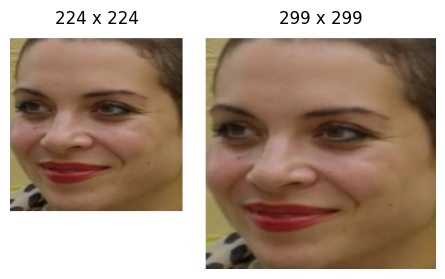

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
from PIL import Image

# 1. 텐서를 PIL 이미지로 변환
img_224_pil = F.to_pil_image(img_224_tensor)
img_299_pil = F.to_pil_image(img_299_tensor)

# 2. 두 이미지 간격 및 캔버스 크기 계산
gap = 30
text_height = 30
canvas_width = img_224_pil.width + img_299_pil.width + gap
canvas_height = max(img_224_pil.height, img_299_pil.height) + text_height

# 3. 빈 흰 배경 이미지(캔버스) 만들기
canvas = Image.new("RGB", (canvas_width, canvas_height), color=(255, 255, 255))

# 4. 이미지 두 개를 캔버스에 붙이기
canvas.paste(img_224_pil, (0, text_height))  # 왼쪽
canvas.paste(img_299_pil, (img_224_pil.width + gap, text_height))  # 오른쪽

# 5. matplotlib로 캔버스 출력 + 텍스트
plt.figure(figsize=(canvas_width / 100, canvas_height / 100), dpi=100)
plt.imshow(canvas)
plt.axis("off")
plt.text(img_224_pil.width // 2, 10, "224 x 224", fontsize=12, ha='center')
plt.text(img_224_pil.width + gap + img_299_pil.width // 2, 10, "299 x 299", fontsize=12, ha='center')

# 6. 저장
plt.savefig("resized_comparison.png", bbox_inches="tight", pad_inches=0)
plt.show()

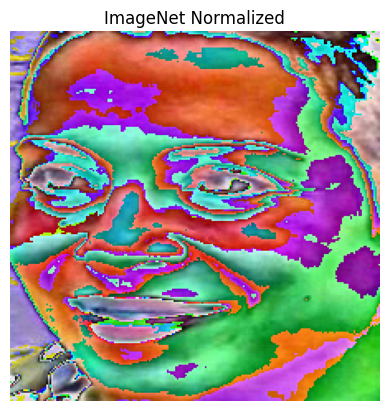

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

# ImageNet 정규화 값
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

# 1. ImageNet 정규화 변환
transform_imagenet_224 = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

# 2. 이미지 불러와서 정규화
img_path = "/content/drive/MyDrive/25-1 티썸/data/cropped/original/01__hugging_happy_01.jpg"
image = Image.open(img_path).convert("RGB")
img_imagenet_tensor = transform_imagenet_224(image)

# 3. 그대로 시각화 (이상한 색으로 나올 것!)
# to_pil_image 전에 값이 [-2, +2] 범위이므로 이상하게 시각화됨
img_wrong_color = F.to_pil_image(img_imagenet_tensor)

# 4. 출력
plt.imshow(img_wrong_color)
plt.title("ImageNet Normalized")
plt.axis("off")
plt.show()

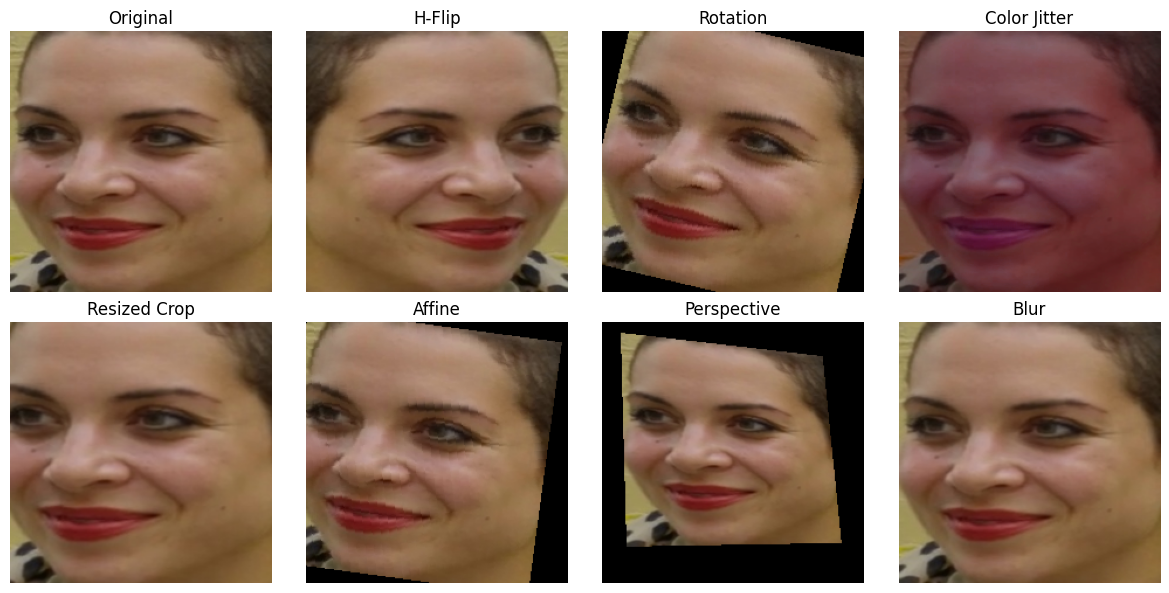

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
from PIL import Image
import random
import torch

# 원본 이미지 불러오기 (예: img_224_tensor → PIL로 변환)
base_image = F.to_pil_image(img_224_tensor)

# 공통 출력 사이즈
output_size = (224, 224)

# 증강 리스트
augmentations = {
    "Original": transforms.Compose([]),
    "H-Flip": transforms.Compose([
        transforms.RandomHorizontalFlip(p=1.0)
    ]),
    "Rotation": transforms.Compose([
        transforms.RandomRotation(degrees=15)
    ]),
    "Color Jitter": transforms.Compose([
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1)
    ]),
    "Resized Crop": transforms.Compose([
        transforms.RandomResizedCrop(size=output_size, scale=(0.8, 1.0))
    ]),
    "Affine": transforms.Compose([
        transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1))
    ]),
    "Perspective": transforms.Compose([
        transforms.RandomPerspective(distortion_scale=0.5, p=1.0)
    ]),
    "Blur": transforms.Compose([
        transforms.GaussianBlur(kernel_size=5)
    ])
}

# 증강 결과 저장
augmented_images = []
for name, aug in augmentations.items():
    transformed = aug(base_image)
    augmented_images.append((name, transformed))

# 시각화
n_cols = 4
n_rows = (len(augmented_images) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 3, n_rows * 3))

for idx, (name, image) in enumerate(augmented_images):
    plt.subplot(n_rows, n_cols, idx + 1)
    plt.imshow(image)
    plt.title(name)
    plt.axis("off")

plt.tight_layout()
plt.savefig("augmentation_examples.png", bbox_inches='tight', pad_inches=0)
plt.show()